# **Importing libraries and data**

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import math

In [16]:
# Loading our data
main_df = pd.read_csv("data_for_k-means.csv")
main_df.head()

,user_id,num_trips,num_sessions,age,gender,married,has_children,session_intencity_index,bargain_hunter_index,hotel_hunter_index,booking_scaled,cancellation_rate_scaled,avg_distance_traveled_scaled,avg_night_scaled,avg_rooms_scaled,avg_bags_scaled,avg_amount_spent_scaled
0,23557,2,8,64,F,True,False,0.0,NaN,0.000973,0.0,0.0,NaN,0.287671,0.166667,NaN,NaN
1,94883,2,8,51,F,True,False,0.0,NaN,NaN,1.0,0.0,0.053364,0.027397,0.166667,0.066176,0.034109
2,101486,2,8,50,F,True,True,0.0,NaN,NaN,0.5,0.0,0.017970,0.123288,0.166667,0.000000,0.026789
3,101961,5,8,43,F,True,False,0.0,0.00018,NaN,1.0,0.0,0.126308,0.273973,0.318182,0.132353,0.022686
4,106907,2,8,44,F,True,True,0.0,NaN,NaN,1.0,0.5,0.474533,0.315068,0.393939,0.661765,1.000000


```python
Prepare Data:
```
Make sure data is ready for clustering by converting categorical variables and filling in missing values with 0.

In [17]:
# Checking format data:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       5998 non-null   int64  
 1   num_trips                     5998 non-null   int64  
 2   num_sessions                  5998 non-null   int64  
 3   age                           5998 non-null   int64  
 4   gender                        5998 non-null   object 
 5   married                       5998 non-null   bool   
 6   has_children                  5998 non-null   bool   
 7   session_intencity_index       5998 non-null   float64
 8   bargain_hunter_index          1718 non-null   float64
 9   hotel_hunter_index            1646 non-null   float64
 10  booking_scaled                5542 non-null   float64
 11  cancellation_rate_scaled      5542 non-null   float64
 12  avg_distance_traveled_scaled  5180 non-null   float64
 13  avg

In [18]:
# Filling in missing values with 0:
main_df.fillna(0, inplace=True)
main_df.head()

,user_id,num_trips,num_sessions,age,gender,married,has_children,session_intencity_index,bargain_hunter_index,hotel_hunter_index,booking_scaled,cancellation_rate_scaled,avg_distance_traveled_scaled,avg_night_scaled,avg_rooms_scaled,avg_bags_scaled,avg_amount_spent_scaled
0,23557,2,8,64,F,True,False,0.0,0.00000,0.000973,0.0,0.0,0.000000,0.287671,0.166667,0.000000,0.000000
1,94883,2,8,51,F,True,False,0.0,0.00000,0.000000,1.0,0.0,0.053364,0.027397,0.166667,0.066176,0.034109
2,101486,2,8,50,F,True,True,0.0,0.00000,0.000000,0.5,0.0,0.017970,0.123288,0.166667,0.000000,0.026789
3,101961,5,8,43,F,True,False,0.0,0.00018,0.000000,1.0,0.0,0.126308,0.273973,0.318182,0.132353,0.022686
4,106907,2,8,44,F,True,True,0.0,0.00000,0.000000,1.0,0.5,0.474533,0.315068,0.393939,0.661765,1.000000


In [19]:
main_df['gender'].value_counts()

F    5292
M     695
O      11
Name: gender, dtype: int64

In [20]:
# Converting categorical variables
convert_values = {'F' : True, 'O' : True, 'M' : False }
main_df['gender'] = main_df['gender'].map(convert_values)

```python
Scaling the Data:
```
 
 It's essential to scale data before applying K Means since K Means is distance-based. 
 
 WE use StandardScaler from Scikit-Learn to standardize our features to have mean = 0 and variance = 1.

In [21]:
# Scaling the data to standardize features to have mean = 0 and variance = 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(main_df)

```python
Run K Means: 
```

In [22]:
# Define the number of clusters
kmeans = KMeans(n_clusters=5)
# Fit the K Means model to scaled data
kmeans.fit(scaled_data)

KMeans(n_clusters=5)

```python
Get Cluster Labels:
```
 After fitting the model, we can get the cluster labels for each data point.

In [23]:
# Extract the cluster labels
cluster_labels = kmeans.labels_
main_df.sample(5)

,user_id,num_trips,num_sessions,age,gender,married,has_children,session_intencity_index,bargain_hunter_index,hotel_hunter_index,booking_scaled,cancellation_rate_scaled,avg_distance_traveled_scaled,avg_night_scaled,avg_rooms_scaled,avg_bags_scaled,avg_amount_spent_scaled
5585,635442,4,9,46,True,True,True,0.0,0.001970,0.00035,1.0,0.0,0.095787,0.171994,0.208754,0.117647,0.025004
3722,554724,1,8,20,True,False,False,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.082192,0.015152,0.000000,0.000000
2397,530118,5,8,42,True,False,False,0.0,0.000577,0.00000,1.0,0.0,0.141792,0.082192,0.318182,0.330882,0.028061
3843,557496,1,8,57,True,False,True,0.0,0.001600,0.00000,1.0,0.0,0.012266,0.027397,0.015152,0.066176,0.035619
3101,542208,5,8,38,True,True,True,0.0,0.000938,0.00000,1.0,0.0,0.271835,0.287671,0.393939,0.132353,0.046489


In [24]:
# Add the cluster labels to  original DataFrame
main_df['cluster'] = cluster_labels

# Group by the cluster labels and calculate summary statistics
cluster_summary_mean = main_df.groupby('cluster').agg({
    'num_trips': 'mean',
    'num_sessions': 'mean',
    'age': 'mean',
    'session_intencity_index': 'mean',
    'bargain_hunter_index': 'mean',
    'hotel_hunter_index': 'mean',
    'booking_scaled': 'mean',
    'cancellation_rate_scaled': 'mean',
    'avg_distance_traveled_scaled': 'mean',
    'avg_night_scaled': 'mean',
    'avg_rooms_scaled': 'mean',
    'avg_bags_scaled': 'mean',
    'avg_amount_spent_scaled':  'mean'
    
})

print(cluster_summary_mean)


         num_trips  num_sessions        age  session_intencity_index  \
cluster                                                                
0         3.919815      8.223207  43.010023                 0.000000   
1         1.470962      8.211530  39.477321                 0.000000   
2         2.667183      8.105263  40.938080                 0.000000   
3         3.369347      8.193467  37.984925                 0.000000   
4         0.000000     12.000000  17.000000                 0.644585   

         bargain_hunter_index  hotel_hunter_index  booking_scaled  \
cluster                                                             
0                    0.001418            0.000299        0.805454   
1                    0.000843            0.000184        0.503639   
2                    0.001276            0.000225        0.673168   
3                    0.002092            0.000247        0.756296   
4                    0.000000            0.000000        0.000000   

         ca

```python
Cluster 0 
```

This cluster consists of travelers who have a relatively high number of trips, sessions, and average distance traveled.
They exhibit a moderate level of bargain hunting and hotel searching.
They tend to book frequently (high booking_scaled) and have a moderate cancellation rate.
These travelers also stay longer on average (higher avg_night_scaled).

```python
Cluster 1 
```

This cluster includes travelers with a lower number of trips and sessions.
They have a lower average age and do not show a strong tendency towards bargain hunting or hotel searching.
Their booking behavior is moderate, and they have a low cancellation rate.
These travelers also stay for shorter durations on average.

```python
Cluster 2 
```

Travelers in this cluster have a moderate number of trips and sessions.
They are neither strong bargain hunters nor hotel searchers but have a moderate tendency in both aspects.
Their booking behavior and cancellation rate are moderate.
Average distance traveled is moderate, and they stay for a reasonable duration.

```python
Cluster 3 
```

This cluster consists of travelers with a high number of trips, sessions, and a high average distance traveled.
They exhibit a strong tendency towards bargain hunting and hotel searching.
Their booking behavior is high, but they also have a significantly higher cancellation rate.
These travelers stay longer on average.

```python
Cluster 4 
```

This cluster represents users with minimal activity, as they have zero trips and sessions.
They have a lower average age, indicating potential new users or inactive accounts.
Their other characteristics are not applicable due to the absence of activity.



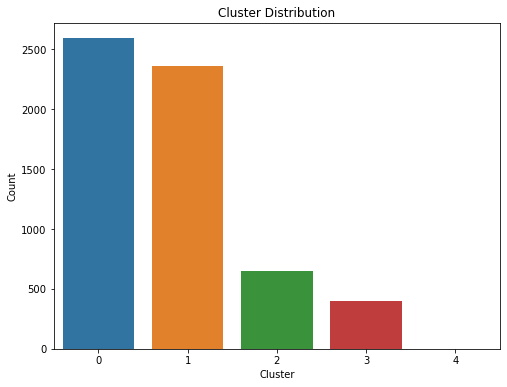

In [25]:
# Cluster Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=main_df, x='cluster')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [26]:
# Cluster Profiles (Radar Chart)
cluster_means = main_df.groupby('cluster').mean().reset_index()
features = ['num_trips','num_sessions','age','session_intencity_index','bargain_hunter_index','hotel_hunter_index', 
            'booking_scaled','cancellation_rate_scaled','avg_distance_traveled_scaled','avg_night_scaled','avg_rooms_scaled',
            'avg_bags_scaled','avg_amount_spent_scaled'] 

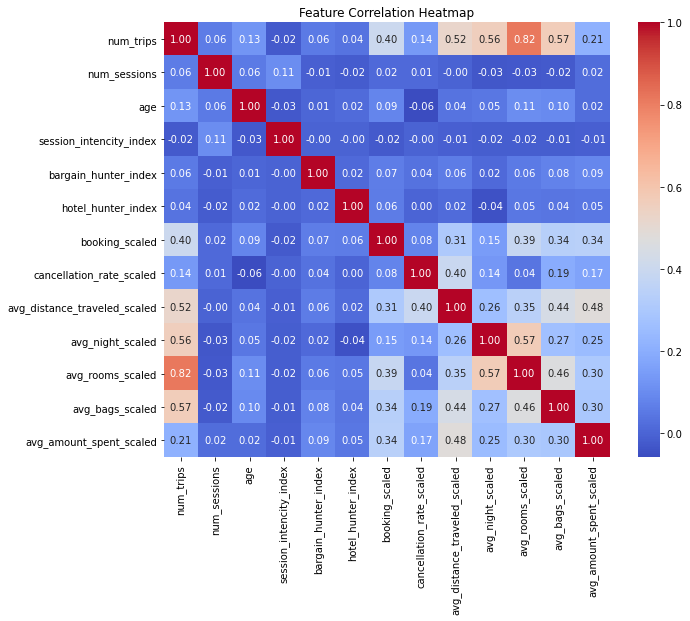

In [27]:
# Heatmap of Feature Correlations
plt.figure(figsize=(10, 8))
correlation_matrix = main_df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

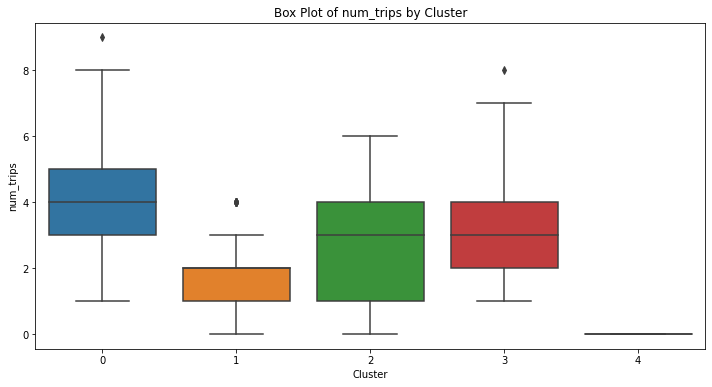

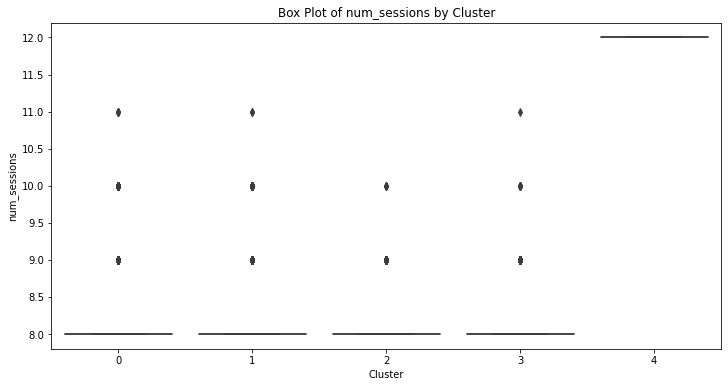

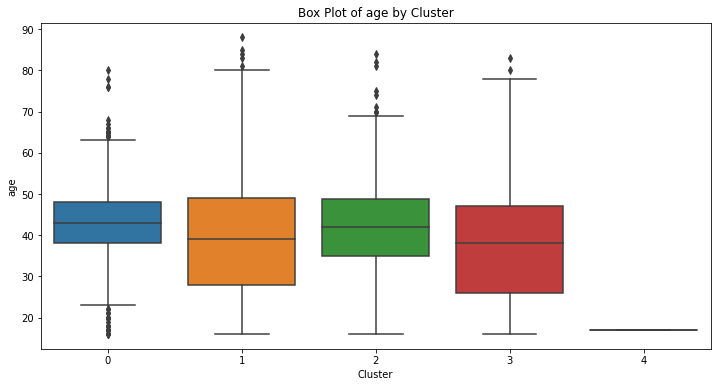

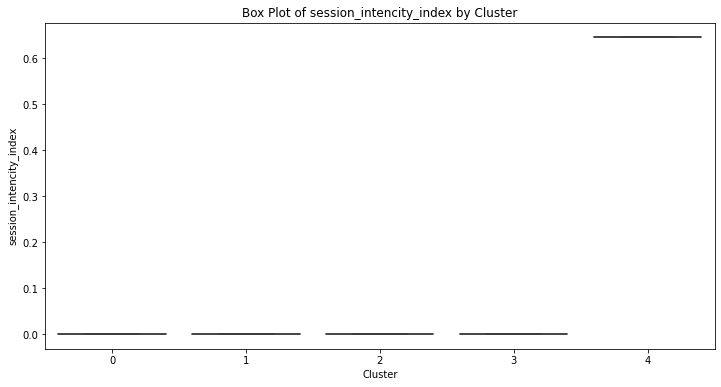

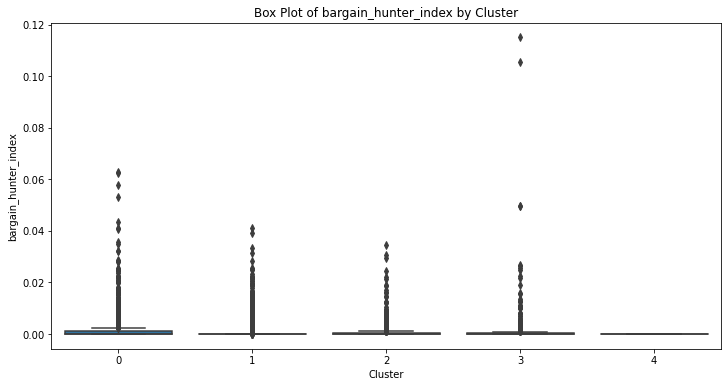

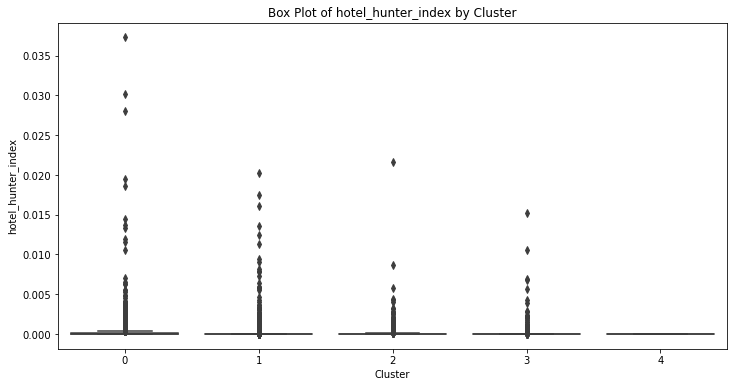

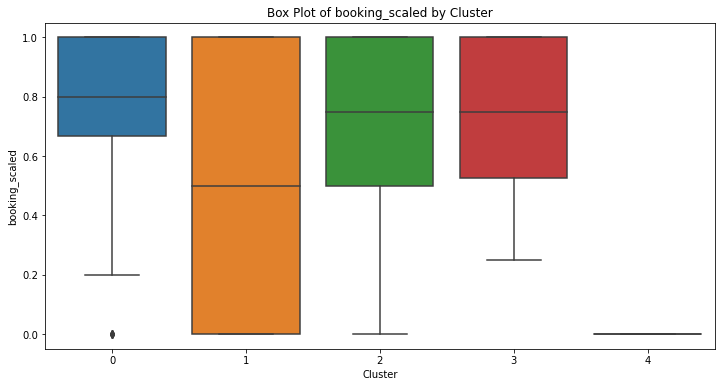

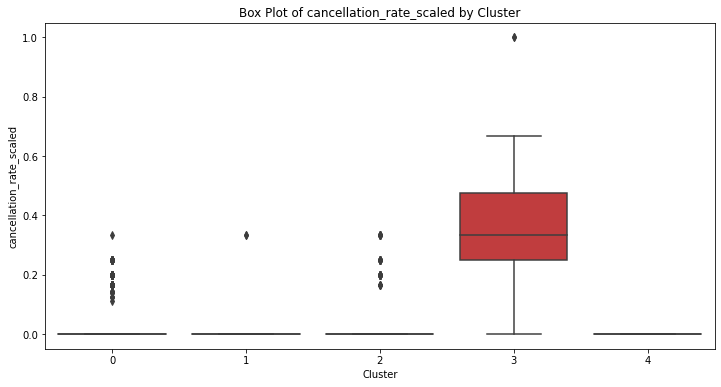

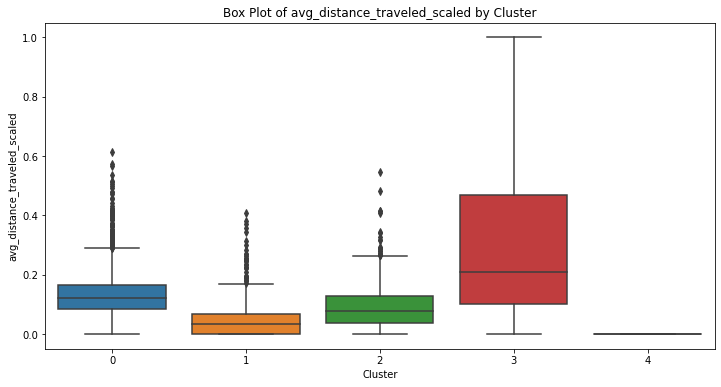

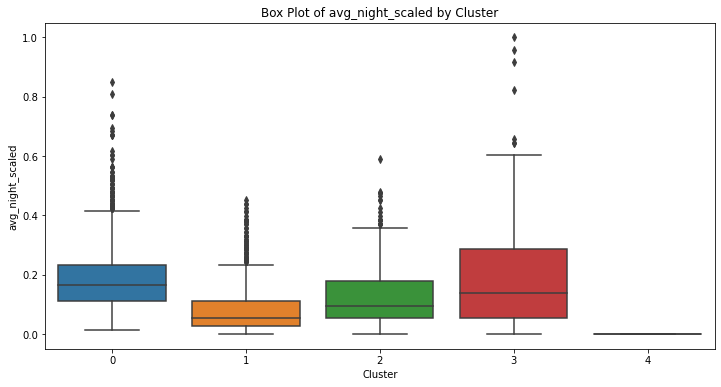

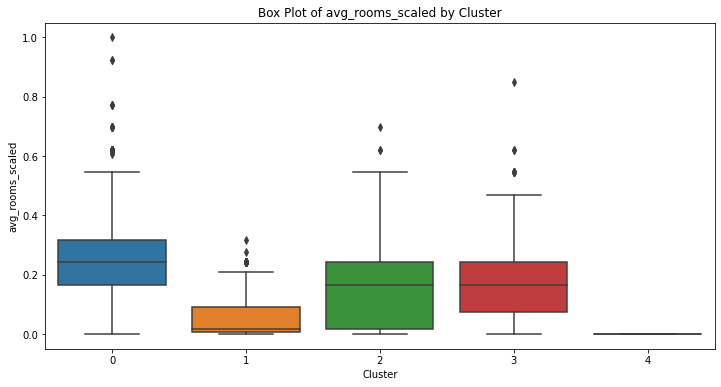

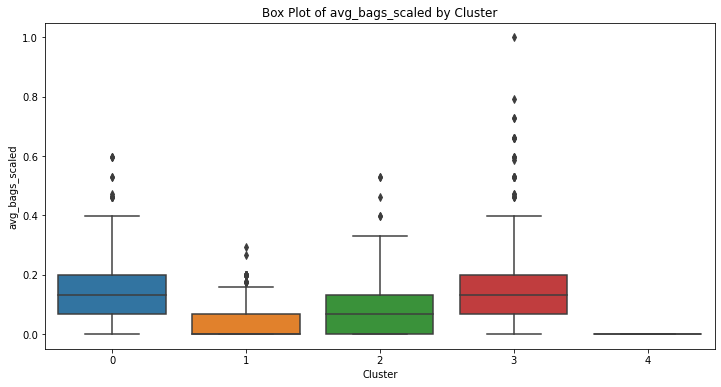

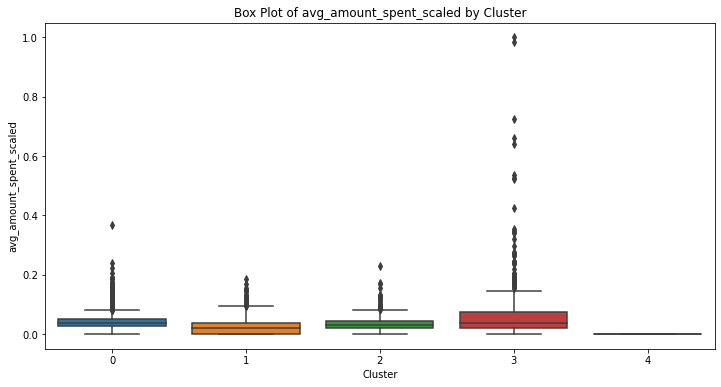

In [28]:
# Box Plots
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=main_df, x='cluster', y=feature)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()